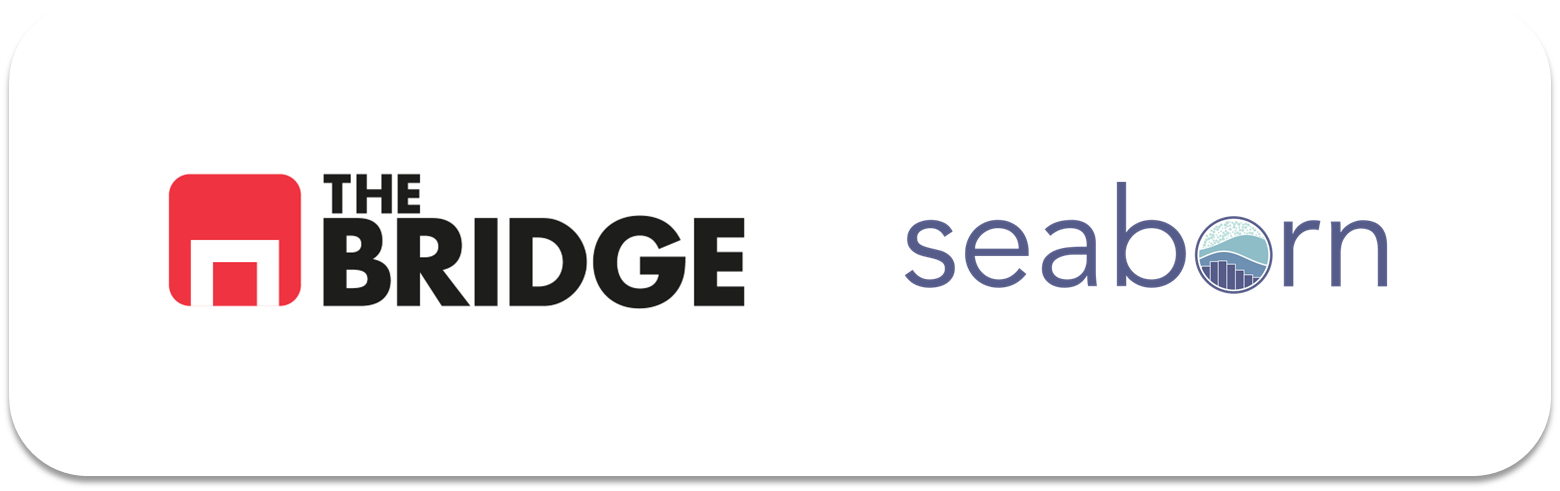

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df = pd.read_csv("./data/california_cities.csv")

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [6]:
def scatter_plot(df, num_col1, num_col2, cat_col = None, size_param = 50, escala = 1, show_legend = True ):
    plt.figure(figsize= (10,6)) #Creación de la figura
    if isinstance(size_param, str): #Si es una cadena, se asume que es el nombre de una columna
        sizes = df[size_param] * escala #Se lo multiplica por la escala definida
    else:
        sizes = size_param 
    if cat_col:
        scatter = sns.scatterplot(x=num_col1, y=num_col2, hue=cat_col, size=sizes, sizes= (20, 200),
                                  data=df, legend=show_legend)
    else:
        scatter = sns.scatterplot(x=num_col1, y=num_col2, size=sizes, sizes= (20, 200),
                                  data=df, legend=show_legend)
    plt.title(f'Diagrama de dispersion de {num_col1} vs {num_col2}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()

    

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

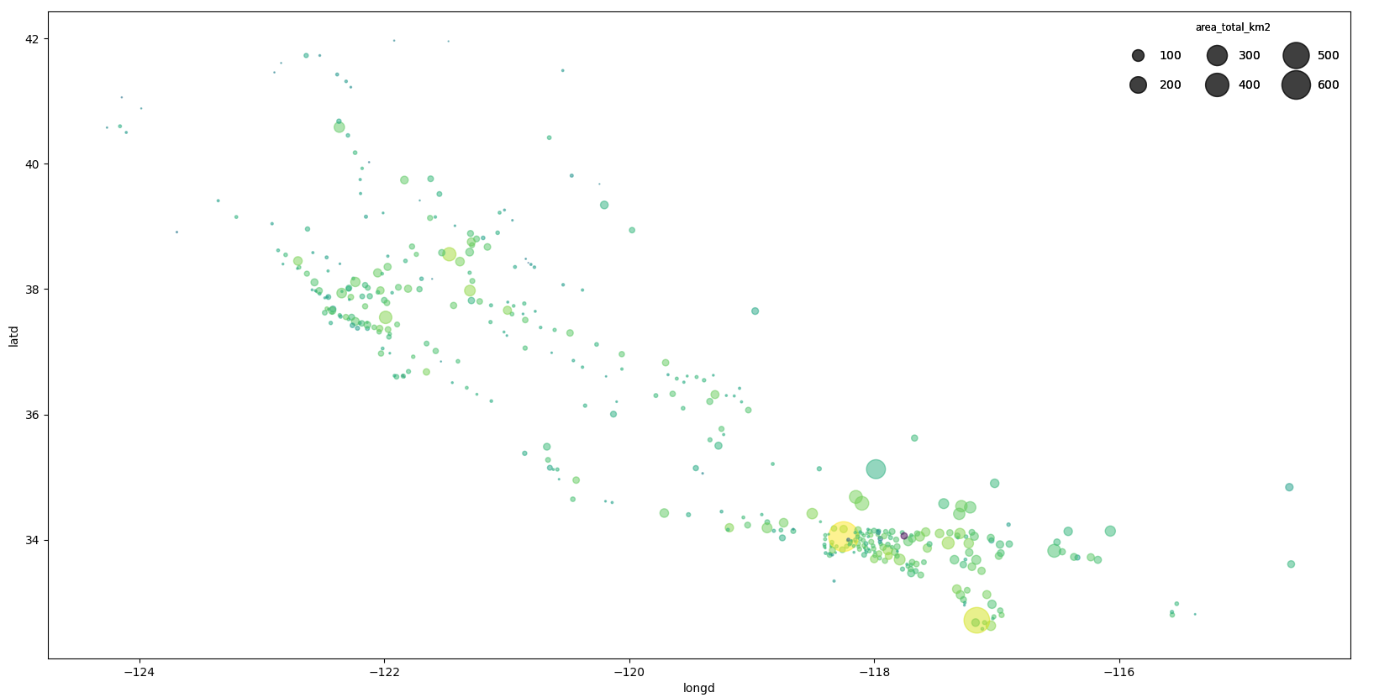

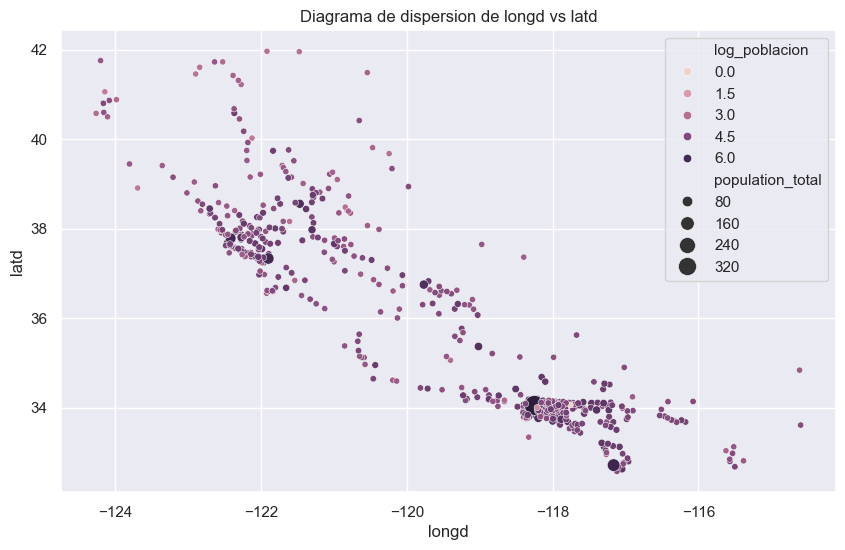

In [15]:
df['log_poblacion'] = np.log10(df['population_total'])
scatter_plot(df, 'longd', 'latd', 'log_poblacion', 'population_total', escala=0.0001)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [21]:

# Cargar el dataset
df_titanic = pd.read_csv('./data/titanic.csv')

In [24]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


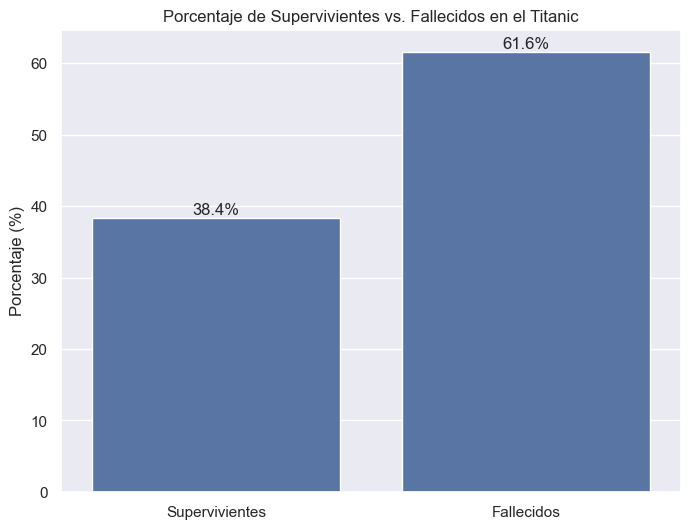

In [45]:
#Slide 1
# Calcular tasas
total_pasajeros = len(df_titanic)
total_supervivientes = df_titanic['survived'].sum()
total_fallecidos = total_pasajeros - total_supervivientes

porcentaje_supervivientes = (total_supervivientes/total_pasajeros)*100
porcentaje_fallecidos = (total_fallecidos/total_pasajeros)*100

# Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Supervivientes', 'Fallecidos'], y=[porcentaje_supervivientes, porcentaje_fallecidos])
plt.title('Porcentaje de Supervivientes vs. Fallecidos en el Titanic')
plt.ylabel('Porcentaje (%)')

# Anotar porcentajes
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.savefig('slide1.png')
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_8493/2845916327.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Adultos', 'Niños'])


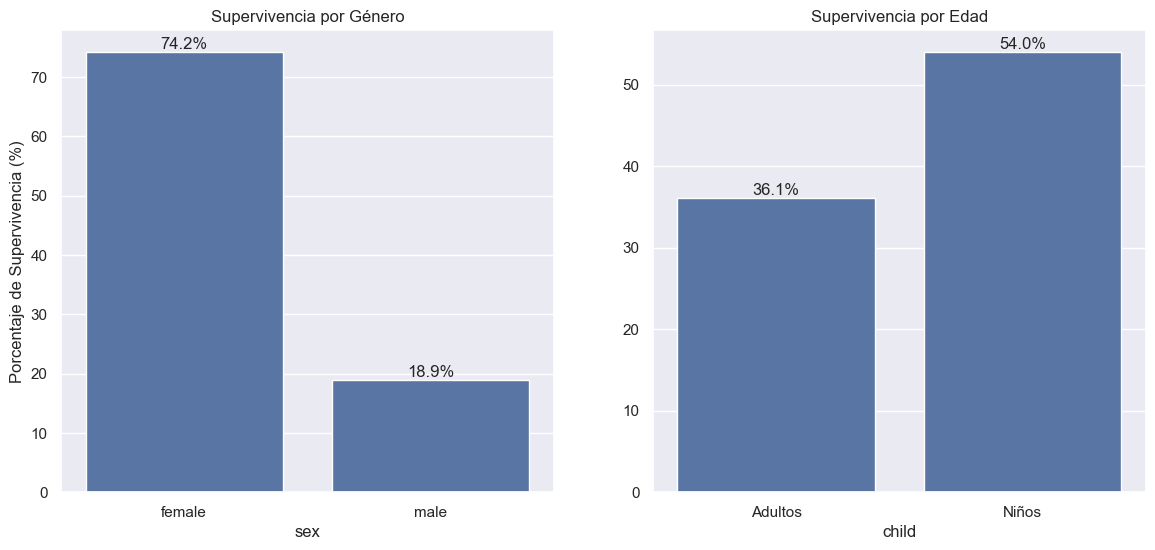

In [48]:
#Slide 2
# # Supervivencia por género
supervivencia_genero = df_titanic.groupby('sex')['survived'].mean() * 100

# Supervivencia por edad
df_titanic['child'] = df_titanic['age'] < 18
supervivencia_edad = df_titanic.groupby('child')['survived'].mean() * 100

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=supervivencia_genero.index, y=supervivencia_genero.values, ax=ax[0])
ax[0].set_title('Supervivencia por Género')
ax[0].set_ylabel('Porcentaje de Supervivencia (%)')

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%')

sns.barplot(x=supervivencia_edad.index, y=supervivencia_edad.values, ax=ax[1])
ax[1].set_xticklabels(['Adultos', 'Niños'])
ax[1].set_title('Supervivencia por Edad')

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.1f%%')

plt.savefig('slide2.png')
plt.show()

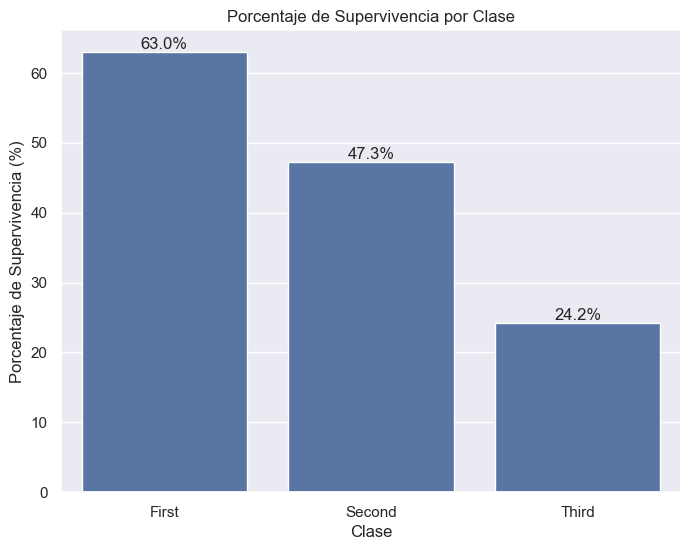

In [52]:
#Slide 3
# Supervivencia por clase
supervivencia_clase = df_titanic.groupby('class')['survived'].mean() * 100

# Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=supervivencia_clase.index, y=supervivencia_clase.values)
plt.title('Porcentaje de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Anotar porcentajes
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')


plt.savefig('slide3.png')
plt.show()

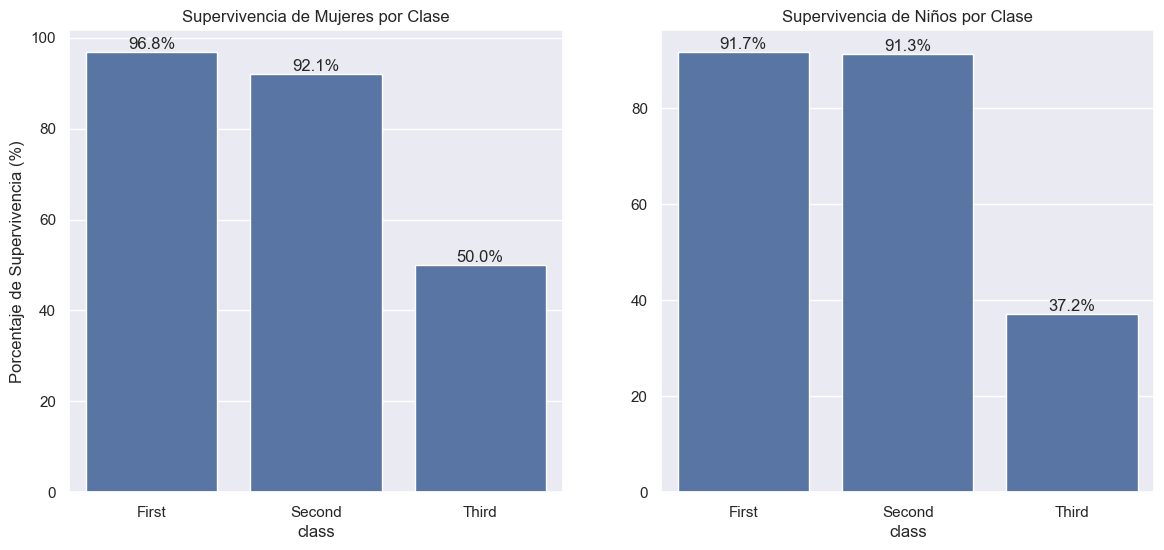

In [53]:
#Slide 4

supervivencia_mujeres_ninos = df_titanic[df_titanic['sex'] == 'female'].groupby('class')['survived'].mean() * 100
supervivencia_ninos = df_titanic[df_titanic['child'] == True].groupby('class')['survived'].mean() * 100

# Gráfico
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=supervivencia_mujeres_ninos.index, y=supervivencia_mujeres_ninos.values, ax=ax[0])
ax[0].set_title('Supervivencia de Mujeres por Clase')
ax[0].set_ylabel('Porcentaje de Supervivencia (%)')

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%')

sns.barplot(x=supervivencia_ninos.index, y=supervivencia_ninos.values, ax=ax[1])
ax[1].set_title('Supervivencia de Niños por Clase')

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.1f%%')
plt.savefig('slide4.png')
plt.show()

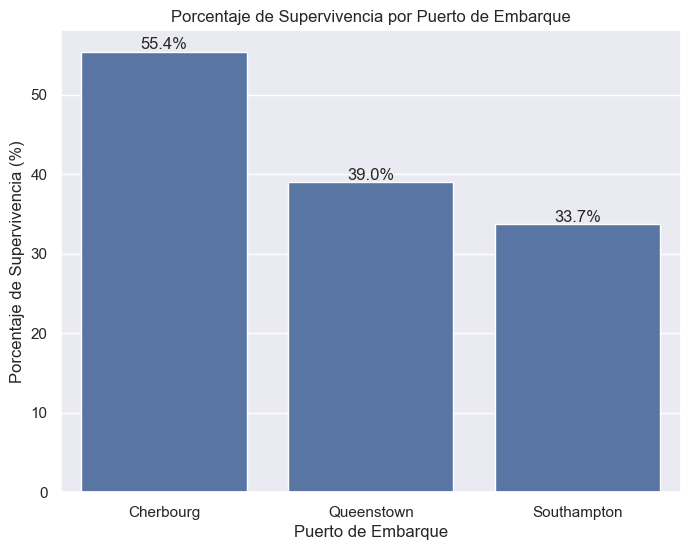

In [56]:
#Slide 5

supervivencia_puerto = df_titanic.groupby('embark_town')['survived'].mean() * 100

# Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=supervivencia_puerto.index, y=supervivencia_puerto.values)
plt.title('Porcentaje de Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Anotar porcentajes
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
    
plt.savefig('slide5.png')
plt.show()

## Alta Tasa de Mortalidad en el Accidente del Titanic

El Titanic fue un accidente con una tasa de mortalidad alta.



![slide1](slide1.png)


## "Las Mujeres y los Niños Primero"

En esa ocasión, los datos apoyan que se dio el "Las mujeres y los niños primero", pero...


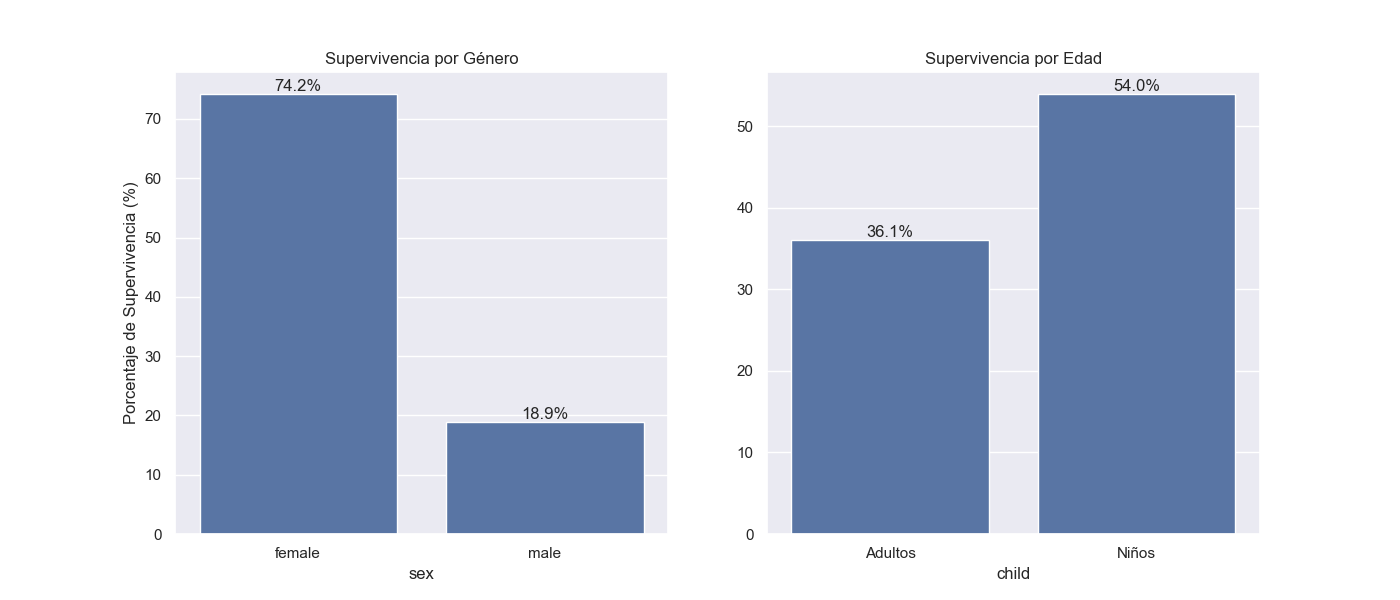

## Influencia de la Clase en la Supervivencia

... que la clase en la que se viaja tuvo una influencia significativa y podría explicar...

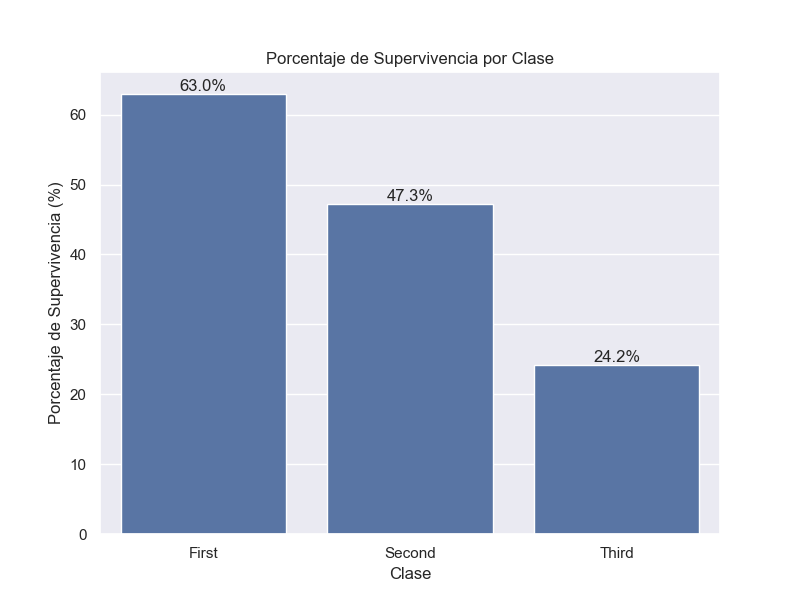

## Diferencias de Supervivencia entre Mujeres y Niños

... las diferencias de tasas de supervivencia entre mujeres y niños.


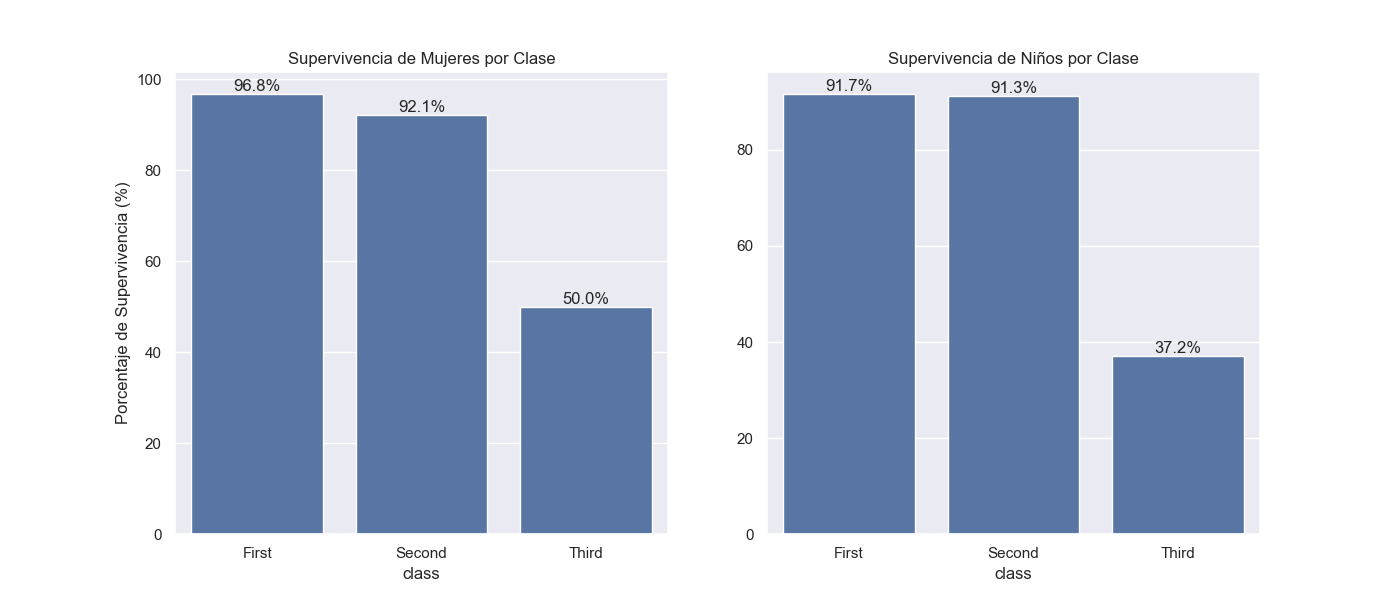

## Influencia del Puerto de Embarque

Además, aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.



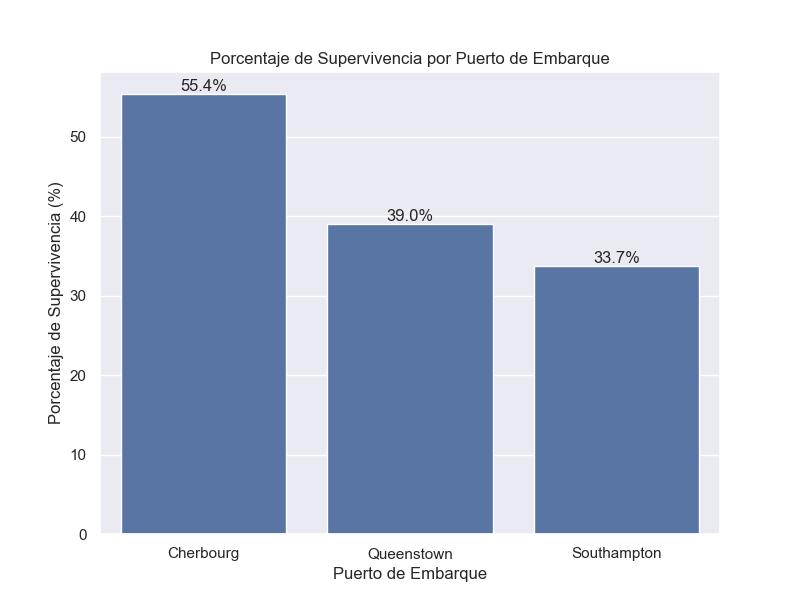